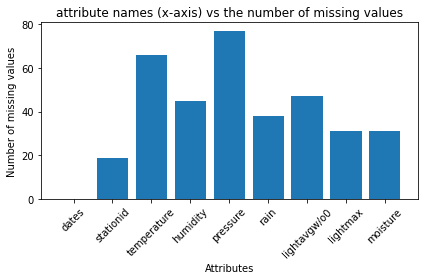

945

In [36]:
"""
Vikas Dangi
B20238
DS3-Lab 2
"""
#Question 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
df_original=pd.read_csv("landslide_data3_original.csv")
df_miss=pd.read_csv("landslide_data3_miss.csv")
NoOfMiss=df_miss.isnull().sum()
attribute_names=df_miss.columns
plt.bar(attribute_names,NoOfMiss)
plt.title("attribute names (x-axis) vs the number of missing values")
plt.xlabel("Attributes")
plt.ylabel("Number of missing values")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
len(df_miss['temperature'])

In [37]:
#Question 2
#a
dfnew=df_miss.dropna(subset=['stationid'])
print("The total number of tuples deleted: ",df_miss['stationid'].size-dfnew['stationid'].size)
#b
l1=dfnew['stationid'].size
dfnew=dfnew.dropna(thresh=dfnew.shape[1]-2)
print("The total number of tuples deleted after new deletion: ",l1-dfnew['stationid'].size)


The total number of tuples deleted:  19
The total number of tuples deleted after new deletion:  35


In [38]:
#Question 3
print("The total number of missing values in each attributes: ")
print(dfnew.isnull().sum())
TotalMissNew=sum(dfnew.isnull().sum())
print("\nThe total number of missing values in the new Dataframe is: ", TotalMissNew)
dfnew0=dfnew


The total number of missing values in each attributes: 
dates            0
stationid        0
temperature     34
humidity        13
pressure        41
rain             6
lightavgw/o0    15
lightmax         1
moisture         6
dtype: int64

The total number of missing values in the new Dataframe is:  116



The values of mean, median and mode for each attribute after filling NA with mean are: 
               temperature   humidity     pressure          rain  \
Mode             21.052444  99.000000  1009.465871      0.000000   
median           21.927010  91.000000  1014.482302     15.750000   
mean             21.052444  83.125974  1009.465871  10798.378825   
Std Deviation     4.339762  18.393926    45.855978  24833.964919   

               lightavgw/o0      lightmax   moisture  
Mode            4488.910300   4000.000000   0.000000  
median          1502.938500   6569.000000  14.169500  
mean            4458.297802  21463.221348  32.602872  
Std Deviation   7606.283539  21943.889293  33.714314  

The values of mean, median and mode for each attribute of original file are: 
               temperature   humidity     pressure          rain  \
Mode             12.727270  99.000000   789.392692      0.000000   
median           22.272730  91.380950  1014.677832     18.000000   
mean        

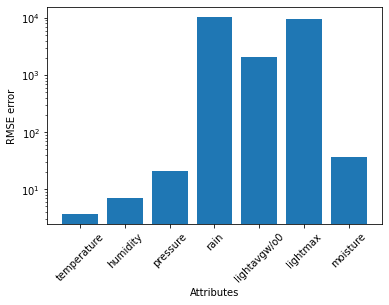


The RMSE between the original and replaced values for each attribute are: 
temperature         3.657229
humidity            6.953065
pressure           21.059204
rain            10539.429262
lightavgw/o0     2055.502854
lightmax         9424.778652
moisture           37.012258
dtype: float64

The values of mean, median and mode for each attribute after linear interpolating are:
 
               temperature   humidity     pressure          rain  \
Mode             12.727270  99.000000   789.392692      0.000000   
median           22.139860  91.179860  1014.925145     15.750000   
mean             21.114539  83.165602  1009.968097  10727.959186   
Std Deviation     4.398734  18.408275    45.999033  24848.714822   

               lightavgw/o0      lightmax   moisture  
Mode            4488.910300   4000.000000   0.000000  
median          1500.500000   6569.000000  13.894400  
mean            4496.753851  21473.799102  32.528672  
Std Deviation   7649.457776  21946.160719  33.791063  


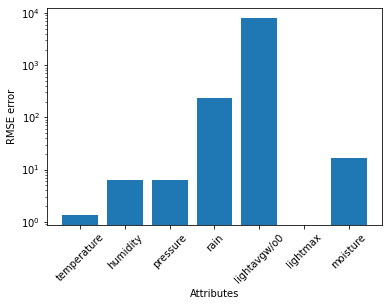

In [39]:
#Question 4
"""

"""
#a

meanSeries=pd.Series(dfnew.mean(skipna=True,numeric_only=True),name='mean')
dfnew=dfnew.fillna(meanSeries)

# i)

# Compute the mean, median, mode and standard deviation for each attributes after filling values
medianSeries=pd.Series(dfnew.median(numeric_only=True),name="median")
stdSeries=pd.Series(dfnew.std(skipna=True,numeric_only=True),name='Std Deviation')
modeSeries=dfnew.mode(numeric_only=True)
modeSeries=modeSeries.rename(index={0:"Mode "})
statnew=modeSeries.append(medianSeries)
statnew=statnew.append(meanSeries)
statnew=statnew.append(stdSeries)
print("\nThe values of mean, median and mode for each attribute after filling NA with mean are: ")
print(statnew)


# Compute the mean, median, mode and standard deviation for each attributes for the original file
medianSeries=pd.Series(df_original.median(numeric_only=True),name="median")
stdSeries=pd.Series(df_original.std(skipna=True,numeric_only=True),name='Std Deviation')
modeSeries=df_original.mode(numeric_only=True)
modeSeries=modeSeries.rename(index={0:"Mode "})
statOriginal=modeSeries.append(medianSeries)
statOriginal=statOriginal.append(meanSeries)
statOriginal=statOriginal.append(stdSeries)
print("\nThe values of mean, median and mode for each attribute of original file are: ")
print(statOriginal)

# ii)

def RMSE(df1,df2,cname):
    oldindex=list(df1.index)
    countmiss=0
    sumsq=0
    for i in oldindex:
        sumsq+=(df1[cname].loc[i]-df2[cname].loc[i])**2
        if((df1[cname].loc[i]-df2[cname].loc[i])!=0):
            countmiss+=1
    if(countmiss==0):
        return 0
    else:
        rmse=math.sqrt(sumsq/countmiss)
    return rmse
cnames=list(attribute_names)[2:10]

RMSElist=[]
for i in cnames:
    RMSElist.append(RMSE(dfnew,df_original,i))
RMSEseries=pd.Series(RMSElist,cnames)

print("\n The plot between Attributes and their RMSE error is: ")
plt.bar(cnames,RMSElist)
plt.xlabel("Attributes")
plt.ylabel("RMSE error")
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()
print("\nThe RMSE between the original and replaced values for each attribute are: ")
print(RMSEseries)



# b

# i)
dfnew0=dfnew0.interpolate()
# Compute the mean, median, mode and standard deviation for each attributes after linear interpolating values
meanSeries=pd.Series(dfnew0.mean(skipna=True,numeric_only=True),name='mean')
stdSeries=pd.Series(dfnew0.std(skipna=True,numeric_only=True),name='Std Deviation')
medianSeries=pd.Series(dfnew0.median(numeric_only=True),name="median")
modeSeries=dfnew0.mode(numeric_only=True)
modeSeries=modeSeries.rename(index={0:"Mode "})
statnew0=modeSeries.append(medianSeries)
statnew0=statnew0.append(meanSeries)
statnew0=statnew0.append(stdSeries)

print("\nThe values of mean, median and mode for each attribute after linear interpolating are:\n ")
print(statnew0)
print("\nThe values of mean, median and mode for each attribute of original file are:\n ")
print(statOriginal)

# ii)
RMSElist0=[]
for i in cnames:
    print(RMSE(dfnew0,df_original,i))
    RMSElist0.append(RMSE(dfnew0,df_original,i))
RMSEseries0=pd.Series(RMSElist0,cnames)

print("\nThe RMSE between the original and interpolated values for each attribute are: ")
print(RMSEseries0)

print("\n The plot between Attributes and their RMSE error is: ")
plt.bar(cnames,RMSElist0)
plt.xlabel("Attributes")
plt.ylabel("RMSE error")
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()


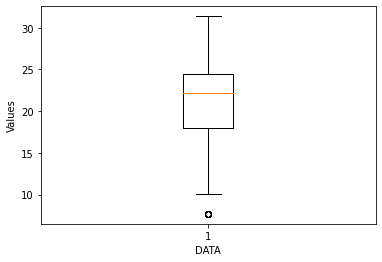


Outliers in temeperature
 [7.6729, 7.6729, 7.6729, 7.6729, 7.6729, 7.6729, 7.6729, 7.6729, 7.6729, 7.6729]


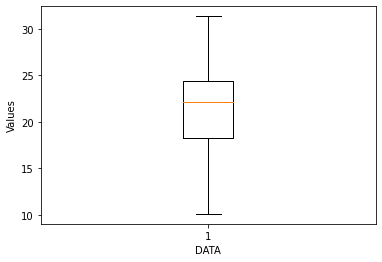

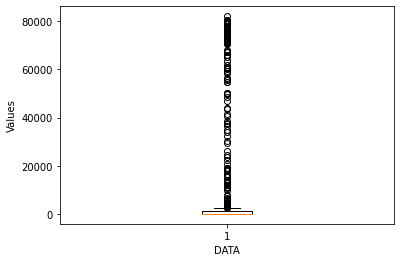


Outliers in Rain
 175


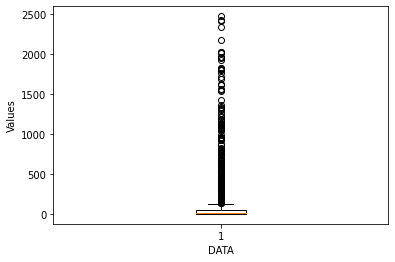

In [40]:
#Question 5
#function to plot boxplots
dfnew0 = dfnew0.reset_index().drop(["index"] , axis = 1)
def plot_boxplot(clm):
    plt.boxplot(dfnew0[clm])
    plt.xlabel("DATA")
    plt.ylabel("Values")
    plt.show()

q1 = dfnew0.quantile(0.25)
q3 = dfnew0.quantile(0.75)

iqr = q3 - q1

# For identifying outliers
def identify_outlier (clm):
    outlier = []
    for i in range(len(dfnew0)):
        if  ((q3[clm] + (1.5 * iqr[clm])) < dfnew0[clm][i] or (dfnew0[clm][i]<(q1[clm] - 1.5 * iqr[clm]))):
            outlier.append(dfnew0[clm][i])
    plot_boxplot(clm)
    return(outlier)

# For replacing outliers
def replacePlot (clm):
    median_value = dfnew0[clm].median()
    for i in range(len(dfnew0)):
        if  (q3[clm] + (1.5 * iqr[clm])) < dfnew0[clm][i] or  (dfnew0[clm][i]<(q1[clm] - 1.5 * iqr[clm]) ):
            dfnew0[clm] = dfnew0[clm].replace([dfnew0[clm][i]], median_value)
    plot_boxplot(clm)


clm = "temperature"
print("\nOutliers in temeperature\n" , identify_outlier(clm))
replacePlot(clm)

clm = "rain" 
print("\nOutliers in Rain\n" ,identify_outlier(clm))
replacePlot(clm)


In [ ]:
def Rmse(x,y,columnname):
    index=list(x.index)
    countmissing=0
    sumofsq=0
    for i in index:
        sumofsq+=(x[columnname].loc[i]-y[columnname].loc[i])**2
        if(x[columnname]-y)